In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths
wd = '/Users/jetcalz07/Desktop/MIDS/W210_Capstone/co2-flux-hourly-gpp-modeling/'
data = wd + 'data/datasets/'
code = wd + 'code/src/'

### Site Folder Structure

In [2]:
print("Each site-level zip file contains data at different temporal resolution (YY, MM, etc.) plus a AUXMETEO and AUXNEE dataset")
site = f"{data}fluxnet_subset/FLX_AR-Vir_FLUXNET2015_SUBSET_2009-2012_1-4/"
display(os.listdir(site))

Each site-level zip file contains data at different temporal resolution (YY, MM, etc.) plus a AUXMETEO and AUXNEE dataset


['FLX_AR-Vir_FLUXNET2015_SUBSET_YY_2009-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_SUBSET_MM_2009-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_SUBSET_WW_2009-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_AUXMETEO_2009-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_AUXNEE_2010-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_SUBSET_HH_2009-2012_1-4.csv',
 'FLX_AR-Vir_FLUXNET2015_SUBSET_DD_2009-2012_1-4.csv']

In [13]:
# Load
site_yy = pd.read_csv(f"{site}FLX_AR-Vir_FLUXNET2015_SUBSET_YY_2009-2012_1-4.csv")
site_mm = pd.read_csv(f"{site}FLX_AR-Vir_FLUXNET2015_SUBSET_MM_2009-2012_1-4.csv")
site_dd = pd.read_csv(f"{site}FLX_AR-Vir_FLUXNET2015_SUBSET_DD_2009-2012_1-4.csv")
site_hh = pd.read_csv(f"{site}FLX_AR-Vir_FLUXNET2015_SUBSET_HH_2009-2012_1-4.csv")

### How many sites have data in each year?

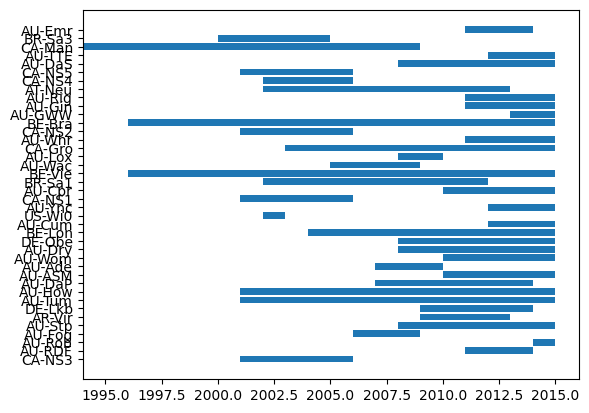

In [6]:
## Gant Chart at site level
sites = [x for x in os.listdir(f"{data}fluxnet_subset/") if 'FLUXNET2015_SUBSET' in x]
site_df = pd.DataFrame(columns=['name', 'start_year', 'num_years'])

for i in range(len(sites)):
    name = sites[i].split("_")[1]
    start_year = np.array(sites[i].split('_')[-2].split("-")).astype(int)[0]
    num_years = np.diff(np.array(sites[i].split('_')[-2].split("-")).astype(int))[0] + 1
    site_df.loc[len(site_df)] = [name, start_year, num_years]
site_df.head()

plt.barh(y=site_df['name'], width=site_df['num_years'], left=site_df['start_year'])
plt.show()

Total Sites: 40, Total Site-Years: 256.0 <------ TEMPORARY, DIDNT DOWNLOAD ALL YET


<AxesSubplot: >

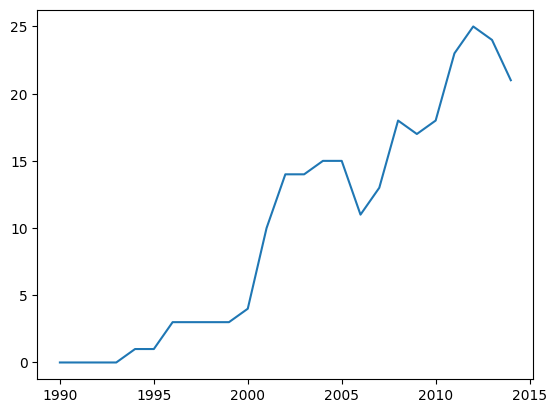

In [7]:
years = list(range(1990, 2015)) # <---- not sure of lower bound once all sites are downloaded
year_counts = dict(zip(years, np.zeros(len(years))))

# For each site, extract the years of available data
for i in range(len(sites)):
    dates = np.array(sites[i].split('_')[-2].split("-")).astype(int)
    for yr in range(dates[0], dates[1]+1):
        year_counts[yr] += 1

print(f"Total Sites: {len(sites)}, Total Site-Years: {sum(year_counts.values())} <------ TEMPORARY, DIDNT DOWNLOAD ALL YET")
sns.lineplot(x=list(year_counts.keys()), y=list(year_counts.values()))

### Site EDA - YY Level

In [8]:
site_yy.head()

,TIMESTAMP,TA_F,TA_F_QC,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,VPD_F_QC,PA_F,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,2009,21.734,0.046690,194.807,0.000057,365.889,0.0,9.837,0.046575,99.899,...,-9999.00,-9999.000,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999,-9999
1,2010,21.223,0.892865,195.189,0.585674,362.555,0.0,9.106,0.885217,99.981,...,1327.65,993.991,1037.19,1091.69,2416.66,2375.11,2402.84,2430.23,-9999,-9999
2,2011,21.458,0.850685,197.114,0.691267,363.575,0.0,9.038,0.847432,99.927,...,2871.05,2585.910,2635.18,2685.66,2985.15,2946.13,3007.45,3079.20,-9999,-9999
3,2012,22.034,0.460724,193.360,0.668204,366.475,0.0,10.153,0.460610,99.923,...,2677.78,2613.390,2927.99,3797.70,2363.94,1819.05,1937.49,2221.02,-9999,-9999


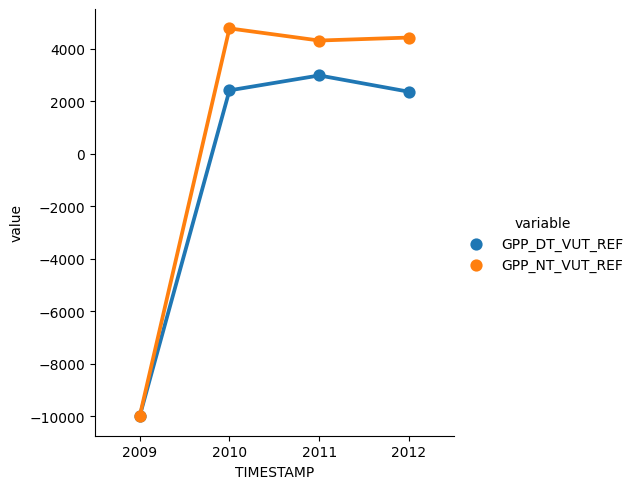

In [9]:
df = pd.melt(site_yy[["TIMESTAMP", "GPP_DT_VUT_REF", "GPP_NT_VUT_REF"]], id_vars = "TIMESTAMP")
sns.catplot(data=df, x="TIMESTAMP", y="value", hue='variable', kind='point')

**Note: Something weird happens where the sign changes pre-2010. Is this a sign change or truly negative output? Or does the value -10k mean null?

### Site EDA - MM Level

In [10]:
site_mm.head()

,TIMESTAMP,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,VPD_F_QC,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,200901,26.175,0.0,500.127,273.424,0.0,388.106,0.0,13.709,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
1,200902,27.047,0.0,463.315,240.578,0.0,404.478,0.0,12.953,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
2,200903,26.434,0.0,401.033,231.365,0.0,386.608,0.0,13.992,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
3,200904,23.916,0.0,325.502,192.067,0.0,359.448,0.0,13.590,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
4,200905,19.553,0.0,261.211,123.103,0.0,357.655,0.0,7.901,0.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '201001'),
  Text(1, 0, '201002'),
  Text(2, 0, '201003'),
  Text(3, 0, '201004'),
  Text(4, 0, '201005'),
  Text(5, 0, '201006'),
  Text(6, 0, '201007'),
  Text(7, 0, '201008'),
  Text(8, 0, '201009'),
  Text(9, 0, '201010'),
  Text(10, 0, '201011'),
  Text(11, 0, '201012'),
  Text(12, 0, '201101'),
  Text(13, 0, '201102'),
  Text(14, 0, '201103'),
  Text(15, 0, '201104'),
  Text(16, 0, '201105'),
  Text(17, 0, '201106'),
  Text(18, 0, '201107'),
  Text(19, 0, '201108'),
  Text(20, 0, '201109'),
  Text(21, 0, '201110'),
  Text(22, 0, '201111'),
  Text(23, 0, '201112'),
  Text(24, 0, '201201'),
  Text(25, 0, '201202'),
  Text(26, 0, '201203'),
  Text(27, 0, '201204'),
  Text(28, 0, '201205'),
  Text(29, 0, '201206'),
  Text(30, 0, '201207'),
  Text(31, 0, '201208'),
  Text(32, 0, '201209'),
  Text(33, 0, '

<Figure size 640x480 with 0 Axes>

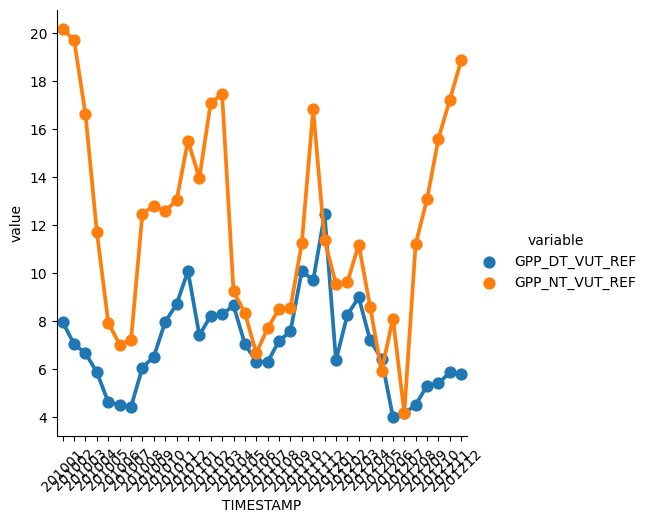

In [11]:
df = pd.melt(site_mm[["TIMESTAMP", "GPP_DT_VUT_REF", "GPP_NT_VUT_REF"]], id_vars = "TIMESTAMP")
df = df.loc[~df['TIMESTAMP'].astype(str).str.contains("2009"), ].copy()

fig = plt.figure()
sns.catplot(data=df, x="TIMESTAMP", y="value", hue='variable', kind='point')
plt.xticks(rotation=45)

### Site EDA - HH Level

In [16]:
print(f"Num records: {len(site_hh)}")
site_hh.head()

Num records: 70128


,TIMESTAMP_START,TIMESTAMP_END,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,200901010000,200901010030,26.778,2,0.0,0.0,2,365.575,2,19.577,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
1,200901010030,200901010100,26.497,2,0.0,0.0,2,365.575,2,18.939,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
2,200901010100,200901010130,26.216,2,0.0,0.0,2,365.575,2,18.301,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
3,200901010130,200901010200,25.935,2,0.0,0.0,2,365.575,2,17.663,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999
4,200901010200,200901010230,25.654,2,0.0,0.0,2,365.575,2,17.025,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999


In [22]:
# Split date
def parse_timestamp(timestamp):
    year = timestamp[0:4]
    month = timestamp[4:6]
    day = timestamp[6:8]
    half_hour = timestamp[8:12]
    year_month_hh = timestamp[0:6] + timestamp[8:12]
    return year, month, day, half_hour, year_month_hh

site_hh[['YEAR', 'MONTH', 'DAY', 'HALFHOUR', 'YEAR_MONTH_HALFHOUR']] = site_hh['TIMESTAMP_START'].astype(str).apply(parse_timestamp).apply(pd.Series)
site_hh.head()

,TIMESTAMP_START,TIMESTAMP_END,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,...,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N,YEAR,MONTH,DAY,HOUR_MINUTE,HALFHOUR,YEAR_MONTH_HALFHOUR
0,200901010000,200901010030,26.778,2,0.0,0.0,2,365.575,2,19.577,...,-9999.0,-9999.0,-9999,-9999,2009,01,01,0000,0000,2009010000
1,200901010030,200901010100,26.497,2,0.0,0.0,2,365.575,2,18.939,...,-9999.0,-9999.0,-9999,-9999,2009,01,01,0030,0030,2009010030
2,200901010100,200901010130,26.216,2,0.0,0.0,2,365.575,2,18.301,...,-9999.0,-9999.0,-9999,-9999,2009,01,01,0100,0100,2009010100
3,200901010130,200901010200,25.935,2,0.0,0.0,2,365.575,2,17.663,...,-9999.0,-9999.0,-9999,-9999,2009,01,01,0130,0130,2009010130
4,200901010200,200901010230,25.654,2,0.0,0.0,2,365.575,2,17.025,...,-9999.0,-9999.0,-9999,-9999,2009,01,01,0200,0200,2009010200


In [28]:
# Groupby to get the average value for each year-month-halfhour
ymhh_mean = pd.DataFrame(site_hh.groupby(['YEAR_MONTH_HALFHOUR'])['GPP_DT_VUT_REF'].mean()).reset_index()

def parse_timestamp_groupby(timestamp):
    year = timestamp[0:4]
    month = timestamp[4:6]
    year_month = year + month
    half_hour = timestamp[6:10]
    return year, month, year_month, half_hour

ymhh_mean[['YEAR', 'MONTH', 'YEAR_MONTH', 'HALFHOUR']] = ymhh_mean['YEAR_MONTH_HALFHOUR'].astype(str).apply(parse_timestamp_groupby).apply(pd.Series)
ymhh_mean.head()

,YEAR_MONTH_HALFHOUR,GPP_DT_VUT_REF,YEAR,MONTH,YEAR_MONTH,HALFHOUR
0,2009010000,-9999.0,2009,01,200901,0000
1,2009010030,-9999.0,2009,01,200901,0030
2,2009010100,-9999.0,2009,01,200901,0100
3,2009010130,-9999.0,2009,01,200901,0130
4,2009010200,-9999.0,2009,01,200901,0200


<AxesSubplot: xlabel='HALFHOUR', ylabel='GPP_DT_VUT_REF'>

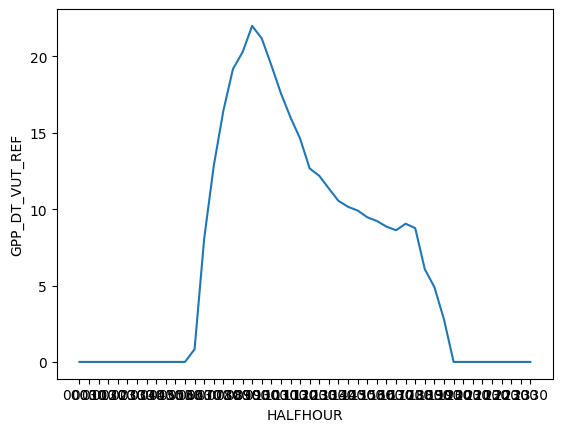

In [33]:
# Visualize one month
month_one = ymhh_mean.loc[ymhh_mean['YEAR_MONTH']=='201101', ].copy()
sns.lineplot(x=month_one['HALFHOUR'], y=month_one['GPP_DT_VUT_REF'])

<AxesSubplot: xlabel='HALFHOUR', ylabel='GPP_DT_VUT_REF'>

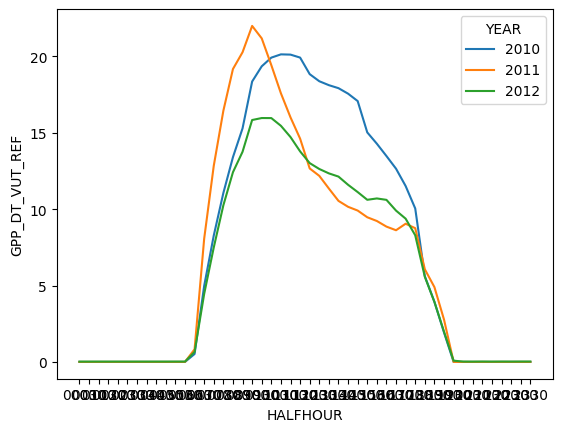

In [36]:
# Visualize the same month for each year
all_jans = ymhh_mean.loc[(ymhh_mean['MONTH']=='01') & (ymhh_mean['YEAR']!='2009'), ].copy()
sns.lineplot(x='HALFHOUR', y='GPP_DT_VUT_REF', hue='YEAR', data=all_jans)